<a href="https://colab.research.google.com/github/MoonSonata3/Mandelbrot/blob/main/Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


visualization of mandelbrot set

In [ ]:
def mandel(n,c):
    if n==0:
        zn=0
    else:
        zn=(mandel(n-1,c)**2)+c

    return zn

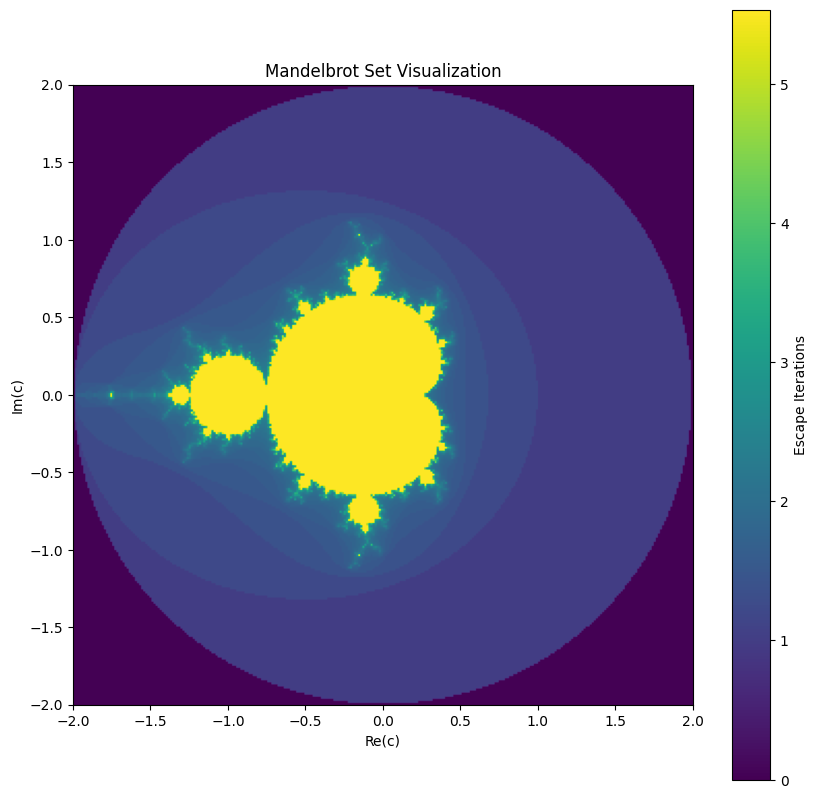

In [ ]:
width = 300
height = 300
max_iter=300

#arrays of evenly spaced real and imaginary values
real = np.linspace(-2, 2, width)
im = np.linspace(-2, 2, height)

#meshgrid from the real and imaginary arrays
real_grid, imag_grid = np.meshgrid(real, im)

#combine into a complex array
array = real_grid + 1j * imag_grid
#array to store how long it takes each point in array to escape mandelbrot set
result=np.zeros((height,width),int)

for i in range(height):
    for j in range(width):
        c=array[i,j]
        z=0
        count=0
        for k in range(max_iter):
            z=z**2+c
            count+=1
            if np.abs(z)>2:
                break
            result[i,j]=count
#plot
plt.figure(figsize=(10, 10))
plt.imshow(result**0.3, cmap='viridis', extent=(-2, 2, -2, 2), origin='lower')
plt.colorbar(label="Escape Iterations")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot Set Visualization")
plt.show()

Area of mandelbrot set

In [ ]:
N = 100000#numbr of samples
max_iter = 100#max iterations
counter = 0

for i in range(N):
    c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
    z = 0


    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            break

    else :
        counter += 1
proportion_of_points= counter/N
area=16*proportion_of_points
print(area)

1.53104


In [ ]:
def Mandel_area(N,max_iter):
    counter = 0

    for i in range(N):
        c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
        z = 0

        for n in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:
                break

        else :
            counter += 1
    proportion_of_points= counter/N
    area=16*proportion_of_points
    return area

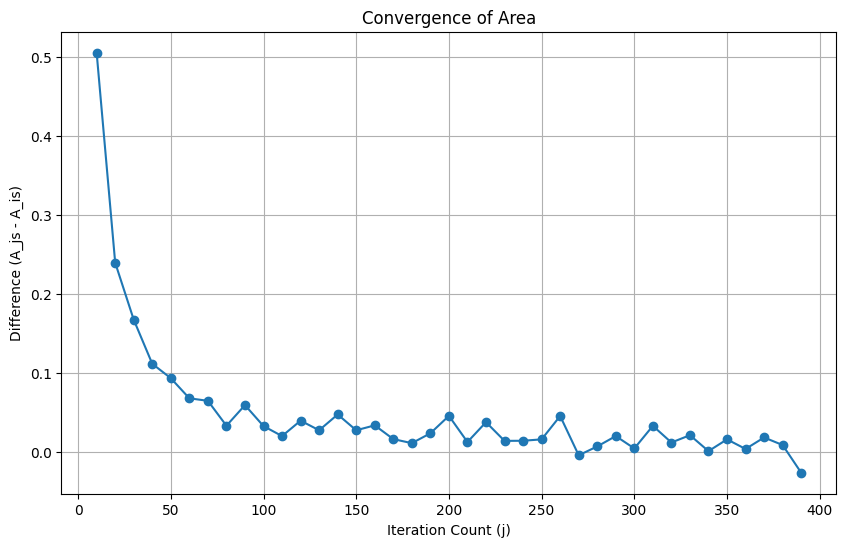

In [ ]:
N = 100000  # samples
i = 400  # iteration count
A_is = Mandel_area(N, i)
areas = []
differences = []

# A_js for j < i
for j in range(10, i, 10):
    area_j = Mandel_area(N, j)
    areas.append(area_j)
    differences.append(area_j - A_is)

#plot
j_values = range(10, i, 10)
plt.figure(figsize=(10, 6))
plt.plot(j_values, differences, marker='o', linestyle='-')
plt.xlabel("Iteration Count (j)")
plt.ylabel("Difference (A_js - A_is)")
plt.title("Convergence of Difference")
plt.grid()
plt.show()

1.550654654654655


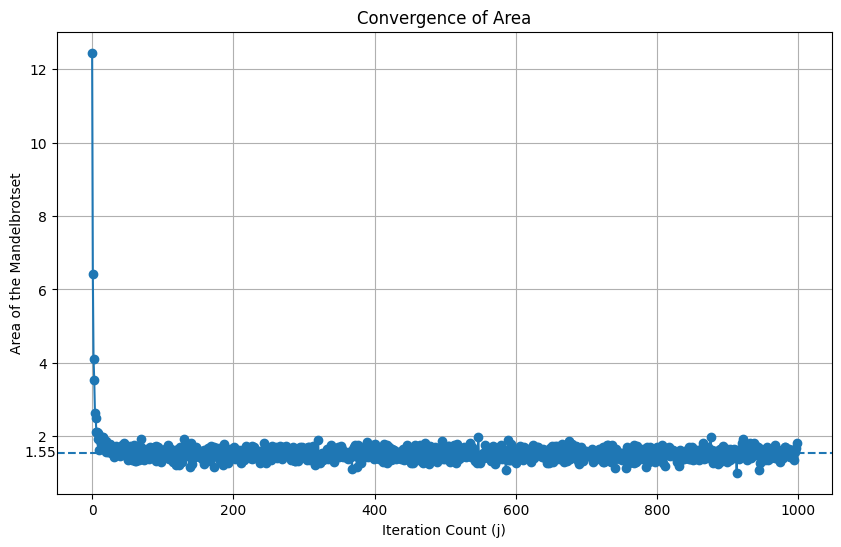

In [ ]:
#also a plot of the area's itself
all_areas = []
for j in range(1, 1000):
    area_j = Mandel_area(1000, j)
    all_areas.append(area_j)

print(np.mean(all_areas))
tick = float(round(np.mean(all_areas),2))

plt.figure(figsize=(10, 6))
plt.plot(all_areas, marker='o', linestyle='-')
plt.xlabel("Iteration Count (j)")
plt.ylabel("Area of the Mandelbrotset")
plt.axhline(np.mean(all_areas), linestyle='--')
plt.text(-52, np.mean(all_areas), f"${tick:.2f}$", ha="right", va="center")
plt.title("Convergence of Area")
plt.grid()
plt.show()

In [ ]:
def pure_random_sampling(nb_samples, itermax):
    """
    This function estimates the area of Mandelbrot with pure random sampling.
    nb_samples: Total number of points that we will sample
    itermax: The maximum number of iterations that we can use to test the divergence.
    """
    # Our counter is here to count the number of points that belong to our Mandelbrot set
    counter = 0

    for _ in range(nb_samples):
        c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
        z = 0
        for _ in range(itermax):
            z = z**2 + c
            if abs(z) > 2:
                break
        else:
            counter += 1

    # Compute the estimated area
    proportion = counter / nb_samples
    area = 16 * proportion

    return area

# For example:
nb_samples = 1000000
itermax = 200

estimated_area = pure_random_sampling(nb_samples, itermax)
print(f"Estimated area of the Mandelbrot set: {estimated_area}")


Estimated area of the Mandelbrot set: 1.523088


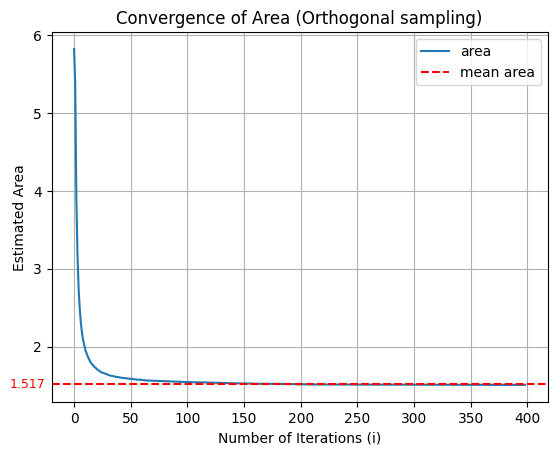

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def orthogonal_sampling(a,b,c,d, no_of_subspaces): #effectively it will be no_of_subspaces^2
  #we will divide the rectangle (a,b) for Re-axis and (c,d) for the Im-axis in n subspaces and then take a sample in every subspace
  step_x = (b-a)/no_of_subspaces
  step_y = (d-c)/no_of_subspaces
  orthogonal_samples = []

  #sample a random coordinate in all subspaces:
  for i in range(no_of_subspaces):
    for j in range(no_of_subspaces):
      x_coord = a + (i + np.random.uniform()) * step_x
      y_coord = c + (j + np.random.uniform()) * step_y
      orthogonal_samples.append((x_coord, y_coord))

  return orthogonal_samples

#now do the sampling: (no of subspaces is essentially the same as "s" in last question)
orthogonal_samples = orthogonal_sampling(a=-2, b=1, c=-1, d=1, no_of_subspaces=100)
orthogonal_samples = np.array(orthogonal_samples)

#function to check if point is inside the set:
def is_in_set(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return n #stop iterating after it has escaped convergence radius and return number of iterations
    return max_iter #otherwise return the maximum number of iterations

area_per_i = []
for iterations in range(1,400):
  inside = []
  outside = []
  for x, y in orthogonal_samples:
      c = complex(x, y)
      n_iter = is_in_set(c, max_iter=iterations)
      if n_iter == iterations:
          inside.append((x, y))
      else:
          outside.append((x, y))
  #area:
  sample_area = (1 - (-2)) * (1 - (-1))
  orthogonal_area = (len(inside) / len(orthogonal_samples)) * sample_area
  area_per_i.append(orthogonal_area)

mean_area = np.mean(area_per_i[100:]) #skip first 100 iterations

plt.plot(area_per_i, label="area")
plt.axhline(mean_area, label="mean area", color='red', linestyle='--')
plt.text(x=-25, y=mean_area, s=f'{mean_area:.3f}', color='red', va='center', ha='right', fontsize=9)
plt.xlabel("Number of Iterations (i)")
plt.ylabel("Estimated Area")
plt.title("Convergence of Area (Orthogonal sampling)")
plt.grid()
plt.legend()
plt.show()


In [ ]:
#we can also check in what way the area converges for different numbers of subspaces
import numpy as np
import matplotlib.pyplot as plt

area_per_no_of_subspaces = []
for subspaces in range(1,250):
    samples = orthogonal_sampling(a=-2, b=1, c=-1, d=1, no_of_subspaces=subspaces)
    samples = np.array(samples)

    inside = []
    for x, y in samples:
        c = complex(x, y)
        n_iter = is_in_set(c, max_iter=250)
        if n_iter == 250:
            inside.append((x, y))

    #area:
    sample_area = (1 - (-2)) * (1 - (-1))
    orthogonal_area = (len(inside) / len(samples)) * sample_area
    area_per_no_of_subspaces.append(orthogonal_area)

mean_area2 = np.mean(area_per_no_of_subspaces[50:])

plt.plot(area_per_no_of_subspaces, label="area")
yticks = plt.yticks()[0]
yticks = yticks[yticks != 1.50]
plt.yticks(yticks)
plt.axhline(mean_area2, label="mean area", color='red', linestyle='--')
plt.text(x=-15, y=mean_area2, s=f'{mean_area2:.3f}', color='red', va='center', ha='right', fontsize=10)
plt.xlabel("Number of Subspaces (n)")
plt.ylabel("Estimated Area")
plt.suptitle("Convergence of Area (Orthogonal sampling)")
plt.title("Fourth run")
plt.grid()
plt.legend()
plt.show()


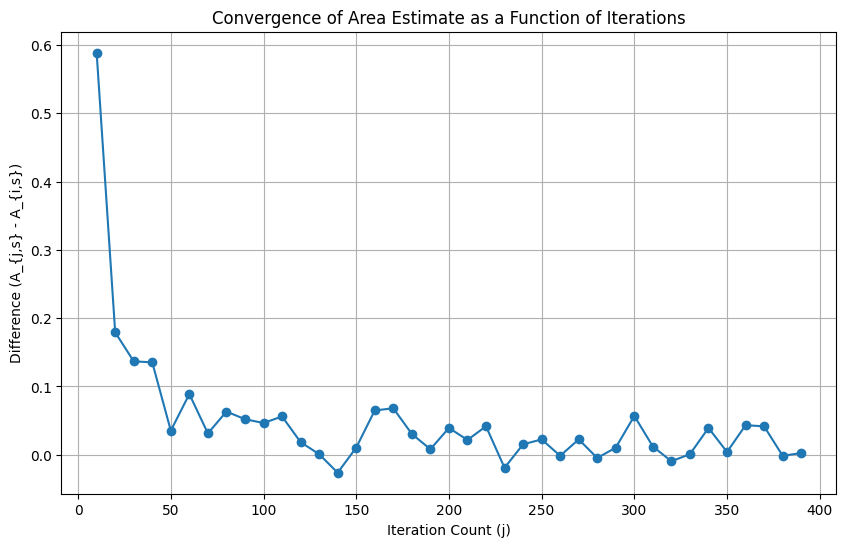

Time taken to run N=20000, max_iter=400: 12.5956 seconds


In [ ]:
# latin hyper cube
start_time=time.time()
def lhs_area(N,max_iter):
    counter = 0
    samples = N
    realaxis = np.linspace(-2, 2, samples)
    imaginaryaxis = np.linspace(-2, 2, samples)

    storage_real = []
    storage_imaginary = []

    #random points within each interval
    for i in range(samples-1):
        start_real = realaxis[i]
        end_real = realaxis[i + 1]
        randompoint_real = np.random.uniform(start_real, end_real)

        start_imag = imaginaryaxis[i]
        end_imag = imaginaryaxis[i + 1]
        randompoint_imaginary = np.random.uniform(start_imag, end_imag)

        storage_real.append(randompoint_real)
        storage_imaginary.append(randompoint_imaginary)

    #permuting the points
    np.random.shuffle(storage_real)
    np.random.shuffle(storage_imaginary)

    # combination
    lhs_samples = np.array(storage_real) + 1j * np.array(storage_imaginary)

    for i in range(N-1):
        c = lhs_samples[i]
        z = 0

        for n in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:
                break

        else :
            counter += 1
    proportion_of_points= counter/N
    area=16*proportion_of_points
    return area

N = 20000  # sample size
i = 400  # iteration count
A_is = lhs_area(N, i)
areas = []
differences = []

# A_js for j < i
for j in range(10, i, 10):
    area_j = lhs_area(N, j)
    areas.append(area_j)
    differences.append(area_j - A_is)

# Plot
j_values = range(10, i, 10)
plt.figure(figsize=(10, 6))
plt.plot(j_values, differences, marker='o', linestyle='-')
plt.xlabel("Iteration Count (j)")
plt.ylabel("Difference (A_{j,s} - A_{i,s})")
plt.title("Convergence of Area Estimate as a Function of Iterations")
plt.grid()
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to run N={N}, max_iter={i}: {elapsed_time:.4f} seconds")
